# EDA on BigMart Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy.random import randn
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from statistics import mode

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
data = pd.read_csv('C:/Users/Naveen Vatsal/Documents/Data/AnVidya/train_kOBLwZA.csv')

In [3]:
sample = pd.read_csv('C:/Users/Naveen Vatsal/Documents/Data/AnVidya/train_kOBLwZA.csv')

In [4]:
data_target = pd.read_csv('C:/Users/Naveen Vatsal/Documents/Data/AnVidya/train_kOBLwZA.csv')

Shape of the Data Loaded: 1st indicates no. of records and 2nd value indicate no . of features

In [ ]:
data.head(10)

In [5]:
categorical_data = data[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size','Outlet_Type']]

In [6]:
numerical_data = data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]

In [ ]:
numerical_data.dtypes

In [7]:
categ_data = pd.DataFrame(categorical_data)

In [ ]:
categ_data.describe()

In [8]:
stats = data.describe()
stats = stats.append(data.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))

The descriptive statistics for the numerical data is as folows:

In [9]:
stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
skew,0.082426,1.167091,0.127202,-0.396641,1.177531
mad,4.045670,0.040793,52.539231,6.955757,1346.570868


Missing values for the dataset:

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Percentage missing values for the Item Item_Weight:

In [11]:
data['Item_Weight'].isnull().sum()/len(data)*100

17.165317376510618

Percentage data missing for the feature Outlet_Size:

In [12]:
data['Outlet_Size'].isnull().sum()/len(data)*100

28.27642848762173

In [ ]:
#for i in range(len(numerical_data.columns)):
    #print("Median for the feature {} is  {}".format(numerical_data.columns[i], numerical_data[numerical_data.columns[i]].median()))

In [ ]:
#from scipy. stats import skew
#for i in range(len(numerical_data.columns)):
    #print("Skewness for the feature {} is  {}".format(numerical_data.columns[i], skew(numerical_data[numerical_data.columns[i]], nan_policy = 'omit')))

Observations from Skewness:
Item Weight is approximately equal to zero. It says that data is near to normally distribution
Item_Visibility is greater than zero. It says that values are right skewed
Item_MRP is also right skewed
Outlet_Establishment_Year is left skewed as it that negative skewness
Item_Outlet_Sales is right skewed as it has a positive skewness

&&

Looking at the kurtosis we can infer that no feature is actually close to normal distribution. Negative kurtosis 
indicates that the corresponding columns have lighter tails and positive kurtosis indicates the corresponding 
columns are heavily tailed.

In [ ]:
#from scipy. stats import kurtosis
#for i in range(len(numerical_data.columns)):
#    print("Kurtosis for the feature {} is  {}".format(numerical_data.columns[i], kurtosis(numerical_data[numerical_data.columns[i]], nan_policy = 'omit')))

In [13]:
#Function to find out the number of outliers if any:

def no_of_outliers(x):
    var = numerical_data[numerical_data.columns[x]]
    Q1 = var.quantile(0.25)
    Q3 = var.quantile(0.75)
    IQR = Q3 - Q1
    result = ((var < (Q1 - 1.5 * IQR)) | (var > (Q3 + 1.5 * IQR)))
    res = result.value_counts()
    return res[1]

Box Plots are plotted for each numerical feature to show the distribution, summary and numerical variability.It also helps us to find if any outliers are present
Usually a value is treated as an oulier if it doesnt lie in Inter Quartile range ie Q1 and Q3

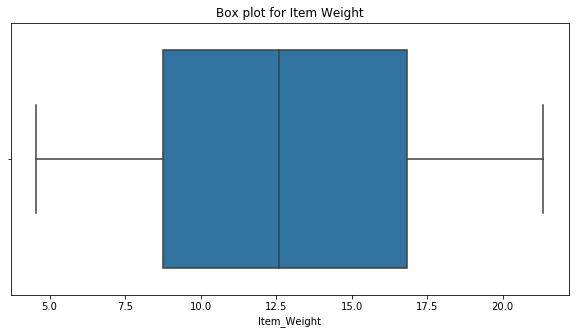

In [14]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(numerical_data['Item_Weight']).set_title("Box plot for Item Weight")

plt.show()

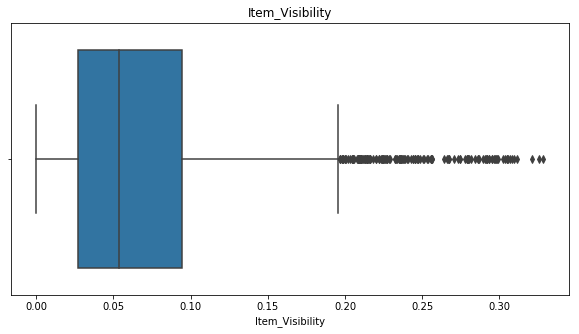

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(numerical_data['Item_Visibility']).set_title("Item_Visibility")

plt.show()

If you look at the Item_visibility we see some values which are present outside Q3. These are treated as outliers. 
So we need to find outlier percentage to see if we can treat them or how much impact they are causing.


Calculate the number of outliers for Item_Visibility

In [16]:

no_of_outliers(1)

144

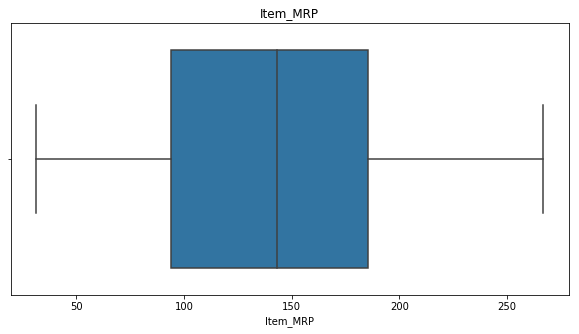

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(numerical_data['Item_MRP']).set_title("Item_MRP")

plt.show()

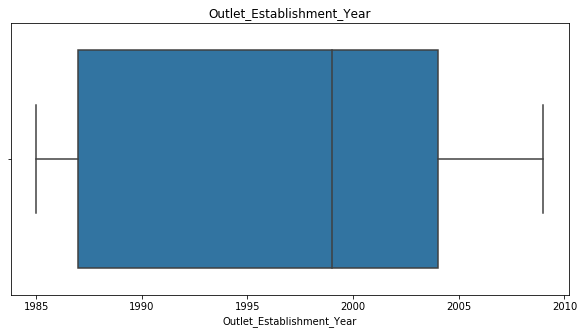

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(numerical_data['Outlet_Establishment_Year']).set_title("Outlet_Establishment_Year")

plt.show()

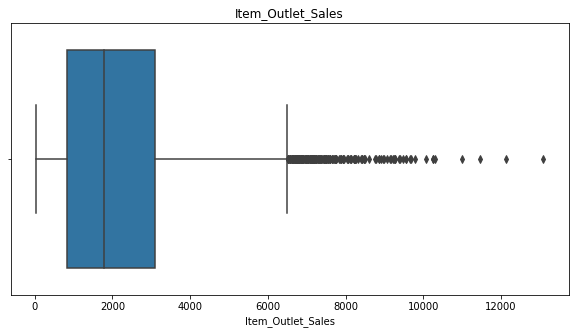

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(numerical_data['Item_Outlet_Sales']).set_title("Item_Outlet_Sales")

plt.show()



This is the target variable. Have a Question. Since this is a target variable can we treat them as outliers?

Calculate the number of outliers for Item_Outlet_sales column

In [20]:
no_of_outliers(4)

186

In [ ]:
#Lets analyze each variable - Univariate Analysis

In [21]:
categorical_data = data[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size','Outlet_Type']]

In [22]:
categorical_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Below are the barplots of each categorical column. It gives us the frequency of each category under a feature

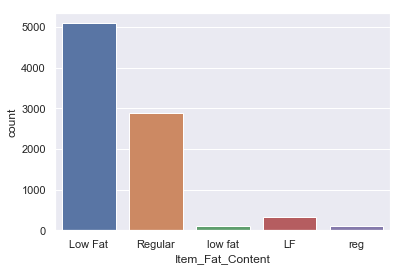

In [23]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Item_Fat_Content", data=categorical_data)

We can represent Three Low Fat categories by a single category.
We can make 2 Regular categories to a single category.

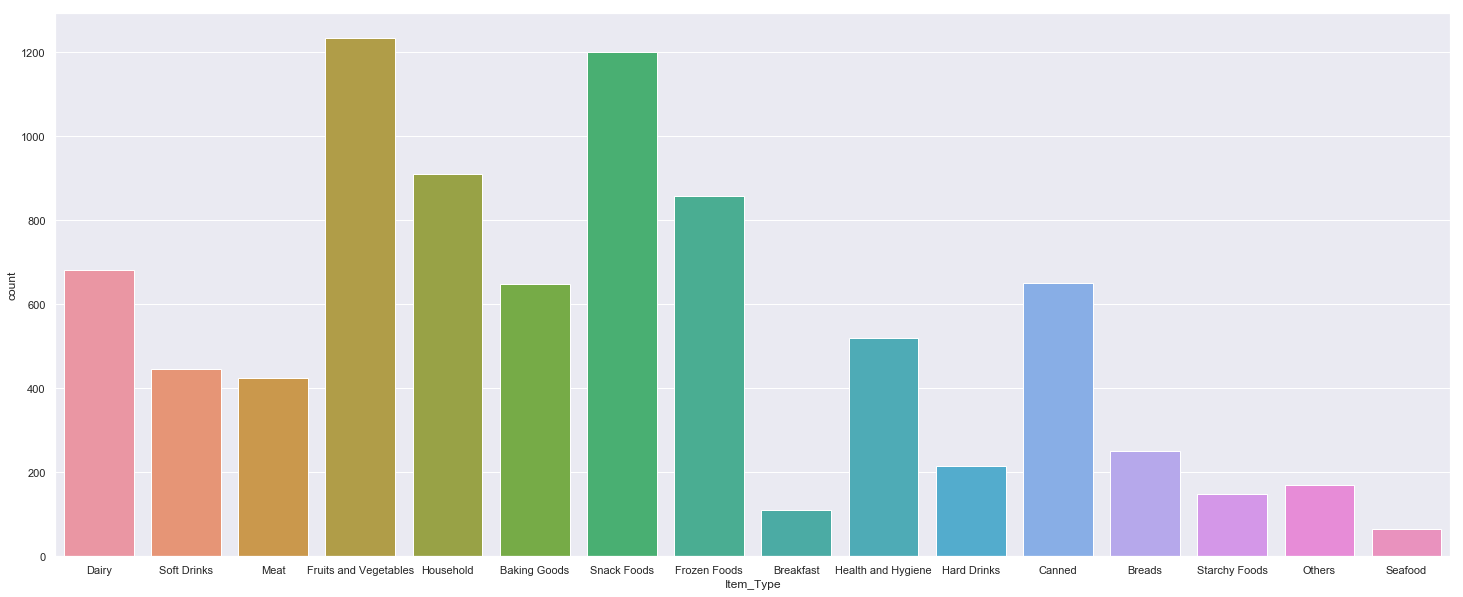

In [24]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x="Item_Type", data=categorical_data)

In [ ]:
# By looking at the above categories We can generalize all the food types to 3 types. 1) Food 2) Non Food Items 3) Drinks

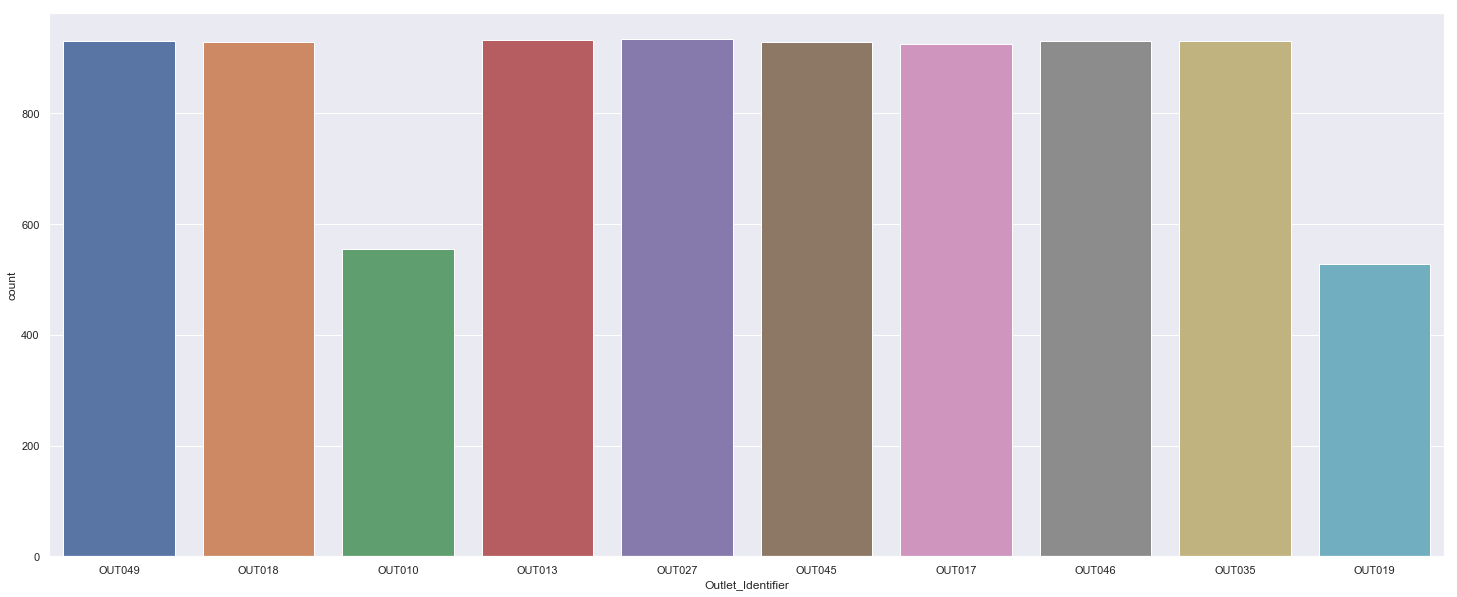

In [25]:

plt.figure(figsize=(25,10))
ax = sns.countplot(x="Outlet_Identifier", data=categorical_data)

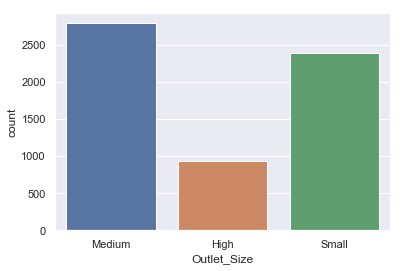

In [26]:
ax = sns.countplot(x="Outlet_Size", data=categorical_data)

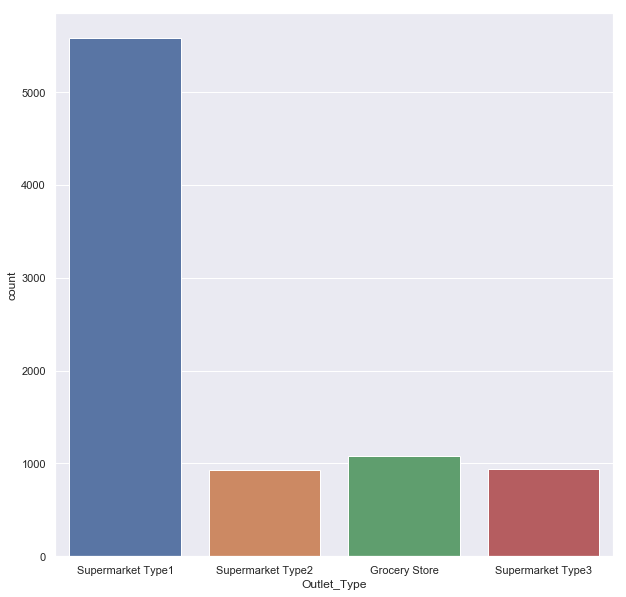

In [27]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Outlet_Type", data=categorical_data)

Below is the histogram of each numerical feature. It gives us the frequency as well as the distribution of the data.

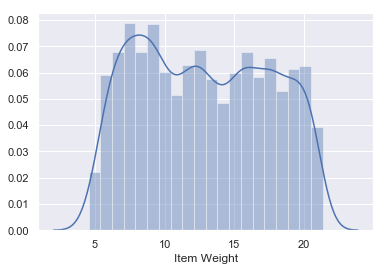

In [28]:
import math
A = numerical_data.Item_Weight
B=A[~np.isnan(A)] #Remove NaN's


x = pd.Series(B, name="Item Weight")
ax = sns.distplot(x)

From above plot we can say that data is neither left skewed  nor right skewed. It is little closer to normal distribtion

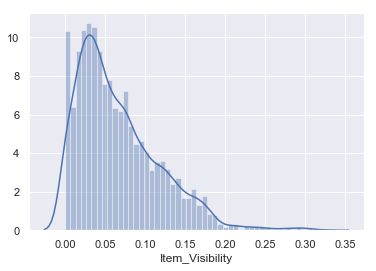

In [29]:
A = numerical_data.Item_Visibility
B=A[~np.isnan(A)] #Remove NaN's

x = pd.Series(B, name="Item_Visibility")
ax = sns.distplot(x)

The feature Item_visibility is right skewed. We need to do feature transformation to make it normalized
--We will cover it in feature engineering

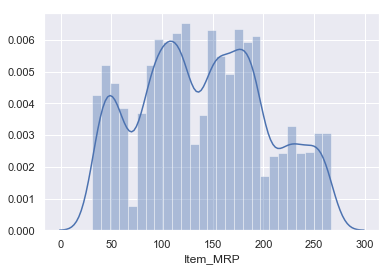

In [30]:
A = numerical_data.Item_MRP
B=A[~np.isnan(A)] #Remove NaN's
x = pd.Series(B, name="Item_MRP")
ax = sns.distplot(x)

The feature Item_mrp need some transormation as well.

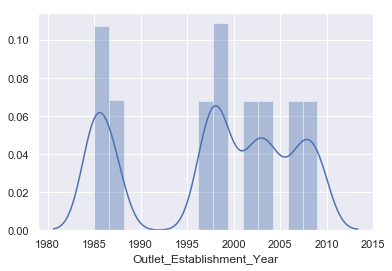

In [31]:
A = numerical_data.Outlet_Establishment_Year
B=A[~np.isnan(A)] #Remove NaN's
x = pd.Series(B, name="Outlet_Establishment_Year")
ax = sns.distplot(x)

There is no physical need to to find out the distribution of an year Instead we will calculate the age of the store
from the year 2013 as per the problem statement

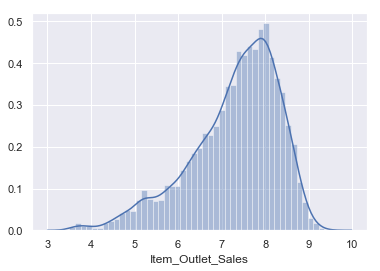

In [32]:
from scipy.stats import norm
A = np.log(numerical_data.Item_Outlet_Sales)
B=A[~np.isnan(A)] #Remove NaN's
x = sns.distplot(B)

The feature Item_Outlet sales is even right skewed. Also we can interpret that majority of the sales lie between 0-4000INR

Bi-Variate Analysis

In [33]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# We can plot how the sales were varying with outlet_sales with Item_weight, Item_Visibilty, Item_Mrp

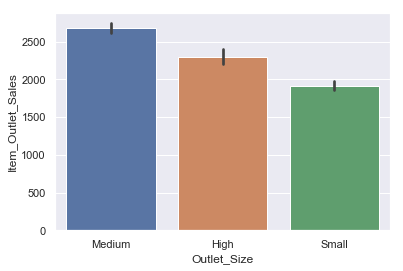

In [34]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)
#We see medium stores have highest sales than small and High

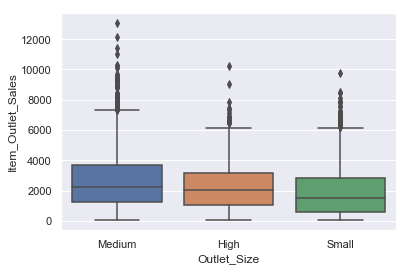

In [35]:
ax = sns.boxplot(x="Outlet_Size", y="Item_Outlet_Sales", data=data)

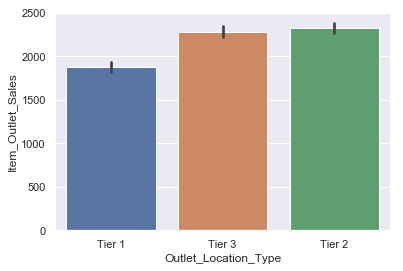

In [36]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)
#Tier1 and Tier 2 have almost similar amount of sales. We need to think of combing them as one category

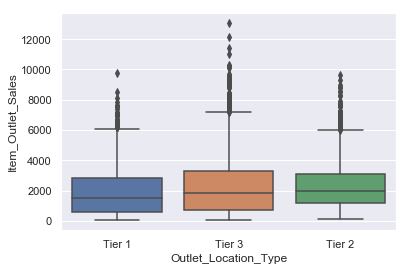

In [37]:
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data=data)

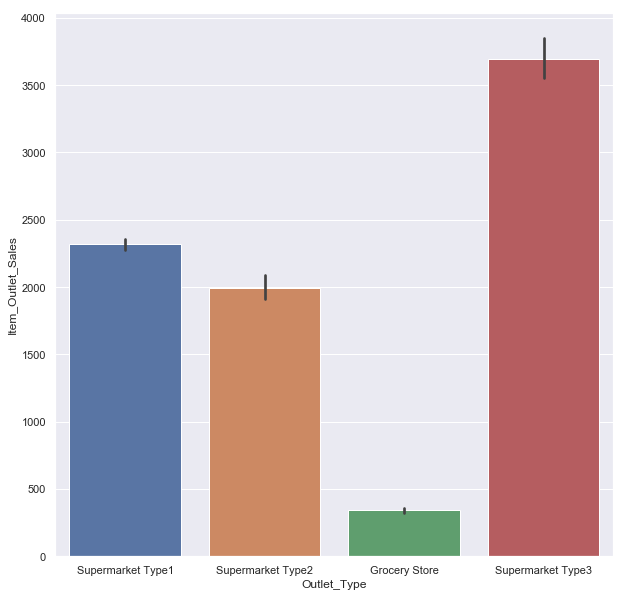

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)
#Type 3 has highest amount of sales

In [ ]:
#plt.figure(figsize=(10,10))
#sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data,palette='rainbow')

The oldest store has mare average number of sales and sales for rest of the years were almost similar except for 1998
We can actually make another column called age and we can plot age vs sales scatter plot to find if they have any relation

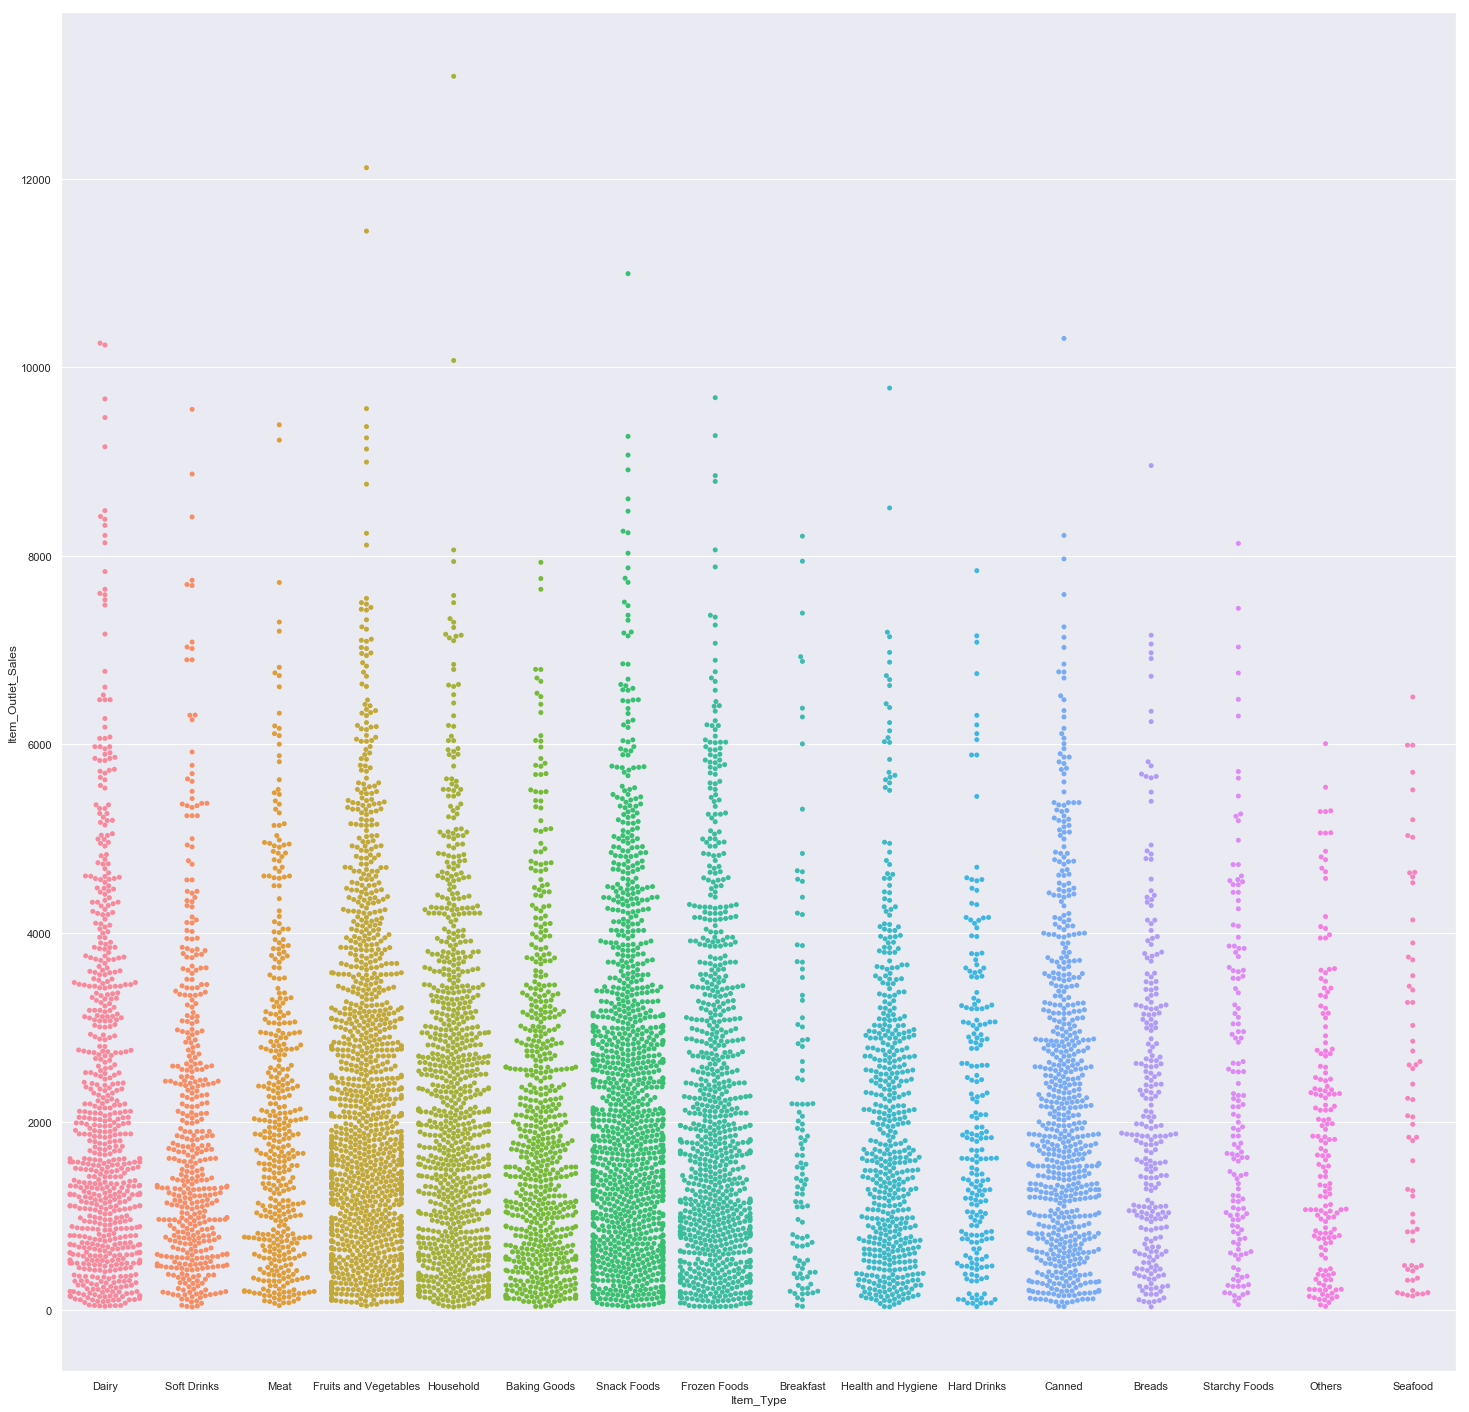

In [39]:
plt.figure(figsize=(25,25))
sns.swarmplot(x="Item_Type",y="Item_Outlet_Sales",data=data)
#From this plot we can infer that majority of the sales were done through Fruits and vegetables, snacks, frozen and 
#household

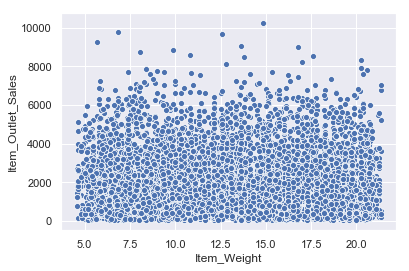

In [40]:
ax = sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", data=numerical_data)

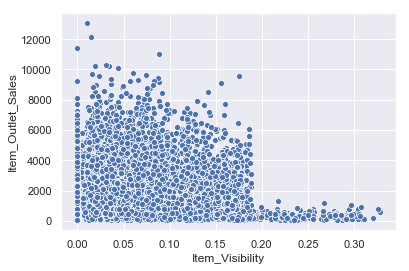

In [41]:
ax = sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data=numerical_data)

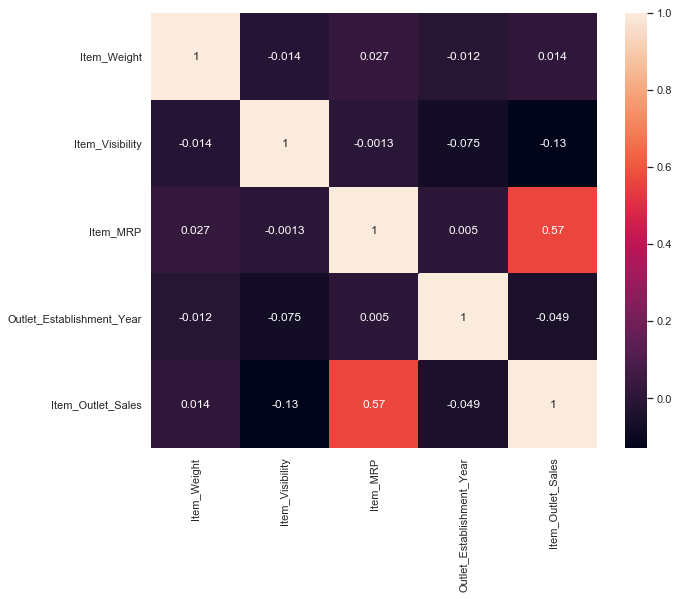

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
corr = numerical_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot = True)

Feature Engineering

Replace missing values
Adjust the skewness, normalize the data
Treat the outliers
Reduce the redundancy by grouping the similar category features

By observing each category in Item Identifier we can create a new column slicing first two characters there by 
classifying only through 3 types named FD, NC, DR

In [43]:
data['Item_classification'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [44]:
data['Item_classification'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_classification, dtype: int64

Item_Identifier has been transformed into new feature Item_type_combined

In [45]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
#data['Item_Type_Modified'] = data['Item_Type']
#for i in range(len(data['Item_Type'])):
#    if (data['Item_Type_Modified'][i] in ['Health and Hygiene ','Household','Others']):
#        data['Item_Type_Modified'][i] = 'Non-consumed'
#    else:
#        data['Item_Type_Modified'][i] = 'Food'
            

In [46]:
def categ(x):
    if x in ['Health and Hygiene ','Household']:
        return 'Non Consumed'
    elif x in ['Others']:
        return 'Others'
    else:
        return 'Food'

In [47]:
data['Item_Type_stn'] = data['Item_Type'].apply(categ)

In [48]:
data['Item_Type_stn'].value_counts()

Food            7444
Non Consumed     910
Others           169
Name: Item_Type_stn, dtype: int64

Transforming the Item_Fat_Content to the Item_Fat_type as follows:

In [49]:
def col_reduce(x):
    if x in ['Low Fat', 'LF', 'low fat']:
        return 'Low Fat'
    else:
        return 'Regular'

In [50]:
data['Item_Fat_Type'] = data['Item_Fat_Content'].apply(col_reduce)

In [51]:
data['Item_Fat_Type'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Type, dtype: int64

In [52]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_classification             0
Item_Type_stn                   0
Item_Fat_Type                   0
dtype: int64

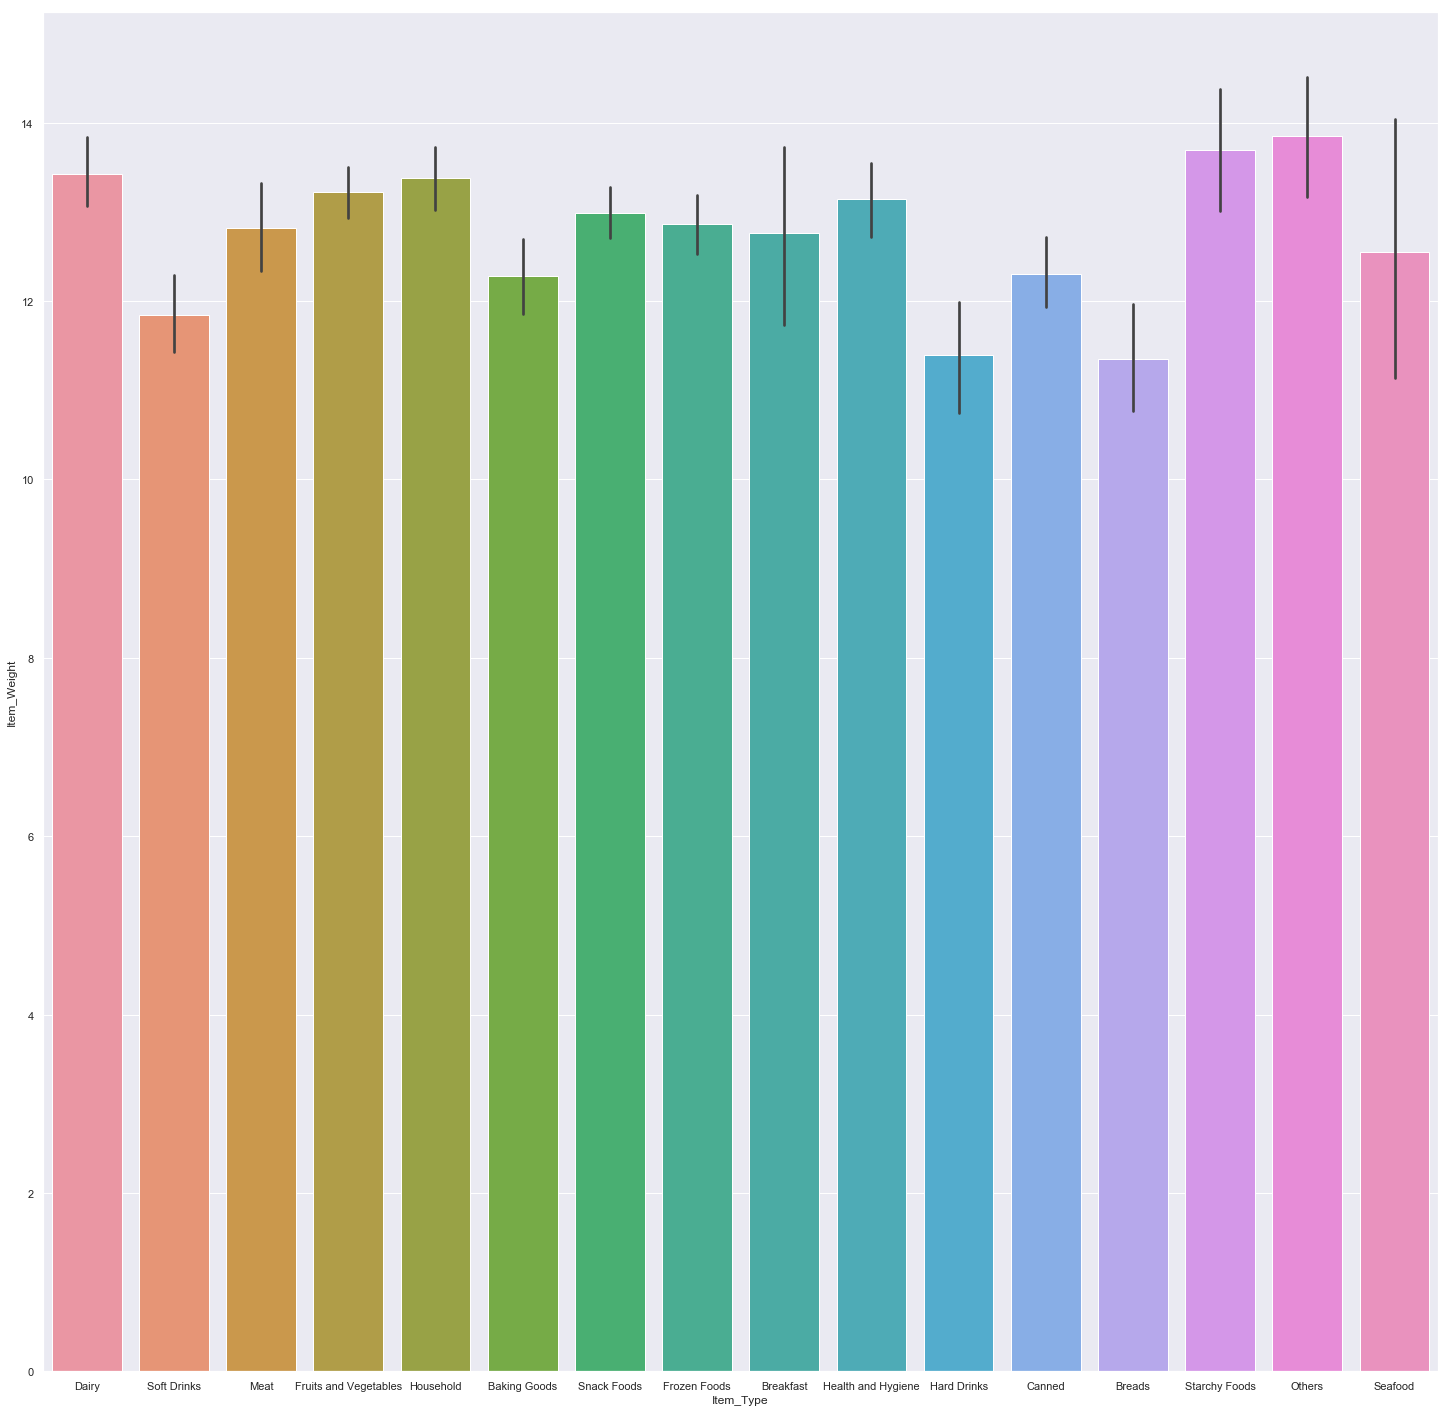

In [53]:
plt.figure(figsize=(25,25))
sns.barplot(x='Item_Type',y='Item_Weight',data=data)

Missing Value Imputation:
    For the feature Item_Weight, Replaced missing values('NaN's) with the corresonding mean grouped by Item_Type which
    would be appropriate because there was a direct relationship between Item Weight and Item Type.

In [54]:
Item_Type_mean = data.groupby("Item_Type")['Item_Weight'].mean()

In [55]:
Item_Type_mean.to_dict()

{'Baking Goods': 12.277108208955255,
 'Breads': 11.3469362745098,
 'Breakfast': 12.768202247191002,
 'Canned': 12.305705009276451,
 'Dairy': 13.42606890459367,
 'Frozen Foods': 12.867061281337076,
 'Fruits and Vegetables': 13.224769381746881,
 'Hard Drinks': 11.400327868852452,
 'Health and Hygiene': 13.142313953488392,
 'Household': 13.384736495388726,
 'Meat': 12.81734421364986,
 'Others': 13.853284671532842,
 'Seafood': 12.5528431372549,
 'Snack Foods': 12.987879554655919,
 'Soft Drinks': 11.847459893048129,
 'Starchy Foods': 13.690730769230765}

In [56]:
import numpy
data['Item_Weight'] = [Item_Type_mean[data['Item_Type'][i]] if numpy.isnan(data['Item_Weight'][i]) else data['Item_Weight'][i] for i in range(len(data)) ]

In [57]:
data['Item_Weight'].isna().sum()

0

Now finding the missing values and replacing them with appropriate values:

In [ ]:
#A = numerical_data.Item_Weight
#B=A[~np.isnan(A)] #Remove NaN's

#x = pd.Series(B, name="Item Weight")
#ax = sns.distplot(x)

In [ ]:
#data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

In [58]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_classification,Item_Type_stn,Item_Fat_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Food,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Food,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Food,Low Fat
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Food,Regular
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Consumed,Low Fat


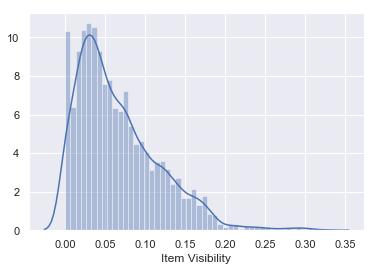

In [59]:
A = numerical_data.Item_Visibility
B=A[~np.isnan(A)] #Remove NaN's

x = pd.Series(B, name="Item Visibility")
ax = sns.distplot(x)

From the above plot the majority of the values are centered around the median.

In [60]:
import pandas as pd
import numpy as np

In [61]:
crosstab = pd.crosstab(data['Outlet_Size'], data['Outlet_Identifier'])
crosstab = pd.DataFrame(crosstab)
crosstab

Outlet_Identifier,OUT013,OUT018,OUT019,OUT027,OUT035,OUT046,OUT049
Outlet_Size,,,,,,,
High,932,0,0,0,0,0,0
Medium,0,928,0,935,0,0,930
Small,0,0,528,0,930,930,0


In [62]:
import scipy
from scipy.stats import chi2_contingency
scipy.stats.chi2_contingency(crosstab)

(12226.000000000002,
 0.0,
 12,
 array([[142.09455259, 141.48470473,  80.49991821, 142.55193849,
         141.78962866, 141.78962866, 141.78962866],
        [425.82627188, 423.99869131, 241.24063471, 427.1969573 ,
         424.9124816 , 424.9124816 , 424.9124816 ],
        [364.07917553, 362.51660396, 206.25944708, 365.2511042 ,
         363.29788974, 363.29788974, 363.29788974]]))

In [86]:
data['Item_Visibility'].replace(0, np.nan, inplace=True)

In [87]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(), inplace = True)

In [88]:
data['Item_Visibility'].describe()

count    8523.000000
mean        0.068874
std         0.045967
min         0.003575
25%         0.033085
50%         0.057792
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64

Now coming to Outlet size: 
    By looking at the plot we can infer the majority of the outlet size class belongs to 'medium'
    Since the feature is categorical by nature we cannot replace by mean or median. so we have to replace by mode.
    Mode(outlet_Size) = 

In [64]:
mode(data['Outlet_Size']) 

'Medium'

In [65]:
data['Outlet_Size'].fillna(mode(data['Outlet_Size']), inplace = True)

We can eliminate Item_Type as it is correlated with Item classification keeping both of them will cause correlation

In [66]:
categ_cols = ['Item_classification','Item_Fat_Type','Outlet_Size','Outlet_Location_Type']

In [67]:
for i in categ_cols:
    print('Frequency of Categories for varible %s'%i)
    print('-'*20)
    print(data[i].value_counts())
    


Frequency of Categories for varible Item_classification
--------------------
FD    6125
NC    1599
DR     799
Name: Item_classification, dtype: int64
Frequency of Categories for varible Item_Fat_Type
--------------------
Low Fat    5517
Regular    3006
Name: Item_Fat_Type, dtype: int64
Frequency of Categories for varible Outlet_Size
--------------------
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Frequency of Categories for varible Outlet_Location_Type
--------------------
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [ ]:
So transforming the Outlet_established _year to Outlet_age :

In [68]:
data['Outlet_Age'] = 2013 - sample['Outlet_Establishment_Year']
data['Outlet_Age'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Age, dtype: float64

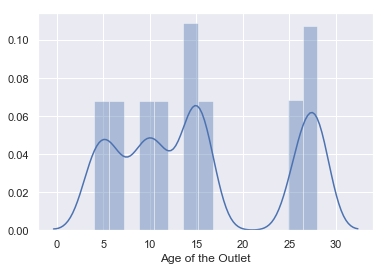

In [69]:
A = data.Outlet_Age
B=A[~np.isnan(A)] #Remove NaN's

x = pd.Series(B, name="Age of the Outlet")
ax = sns.distplot(x)

Bivariate Analysis of outlet_Age vs Outlet_sales

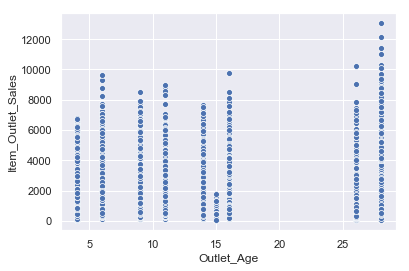

In [70]:
ax = sns.scatterplot(x="Outlet_Age", y="Item_Outlet_Sales", data=data)

Final Analysis to check if the data ahas any missing values

,Total,Percent
Outlet_Age,0,0.0
Item_Fat_Type,0,0.0
Item_Type_stn,0,0.0
Item_classification,0,0.0
Item_Outlet_Sales,0,0.0


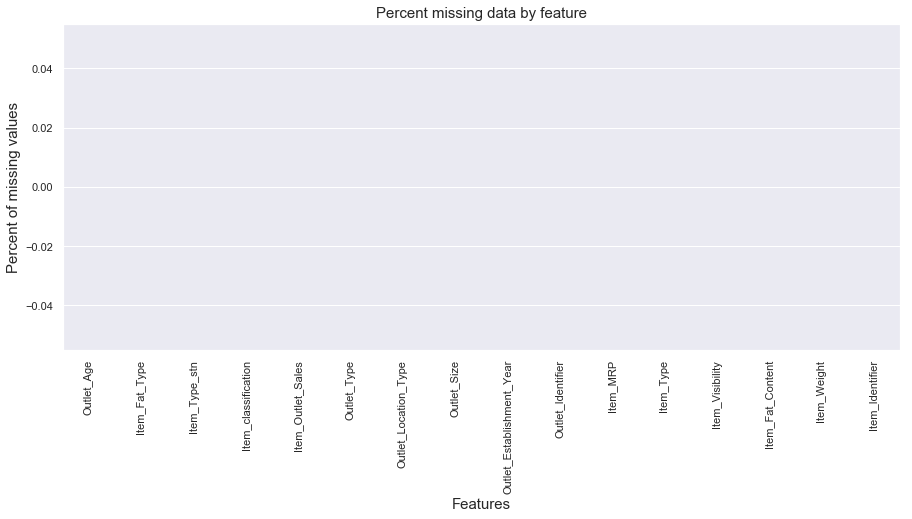

In [71]:
import seaborn as sns
from matplotlib import pyplot as plt
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

From the above plot we can say that dataset is completely free of missing values

Treating Outliers:

Target Variable has 186 outliers, Since the outlier percentage is not quite less we will
replace all the outliers with the upper limit

In [72]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [73]:
var = data.Item_Outlet_Sales
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)
IQR = Q3 - Q1
ub = Q3+1.5*IQR
lb = Q1-1.5*IQR
print(lb,ub)


-2566.3261 6501.8699


In [74]:
result = var[var>(Q3+1.5*IQR)]

In [75]:
def outlier_rep(x):
    if x > ub:
        return ub
    else:
        return x
    

Treated the Target variable 'Item_Outlet_sales' Outlier by replacing the extreme values with Third Quartile

In [76]:
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].apply(outlier_rep)

In [77]:
data['Item_Outlet_Sales'].describe()

count    8523.000000
mean     2156.313016
std      1624.863069
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      6501.869900
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Similarly we the the Outliers for the feature Item_visibility

In [ ]:
def outlier_rep(x):
    if x > ub:
        return ub
    else:
        return x
    

In [89]:
var = data.Item_Visibility
Q1 = var.quantile(0.25)
Q3 = var.quantile(0.75)
IQR = Q3 - Q1
ub = Q3+1.5*IQR
lb = Q1-1.5*IQR
print(lb,ub)

-0.059164579999999994 0.186835216


In [90]:
data['Item_Visibility'] = data['Item_Visibility'].apply(outlier_rep)

In [91]:
data['Item_Visibility'].describe()

count    8523.000000
mean        0.068706
std         0.045519
min         0.003575
25%         0.033085
50%         0.057792
75%         0.094585
max         0.186835
Name: Item_Visibility, dtype: float64

In [ ]:
data.head()

We are not using the following features:
    1)Item_Identifier -- It has been replaced by Item_Classifier
    2)Outlet_Establishment_Year - It has been replaced by Outlet Age
    3)Also Item_Type as it is correlated with Item_Classifier

Now by considering the categorical features, We do one hot encoding to transform to numerical data:

In [92]:
data.drop(['Item_Identifier','Outlet_Identifier','Item_Type','Outlet_Establishment_Year','Item_Type_stn','Item_Fat_Content'], axis=1, inplace=True)

In [ ]:
data.columns

In [93]:
categorical_cols = ['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_classification','Item_Fat_Type']

In [94]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in categorical_cols:
    data[i] = enc.fit_transform(data[i])
    

In [ ]:
data.head(5)

In [ ]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

Numerical Transformations

Starting with Target Variable. Item_Outlet_Sales before and after transforming.

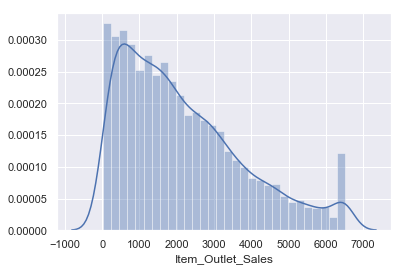

In [95]:
from scipy.stats import norm
import seaborn as sns
import math
A = data.Item_Outlet_Sales
B=A[~np.isnan(A)] #Remove NaN's
x = sns.distplot(B)

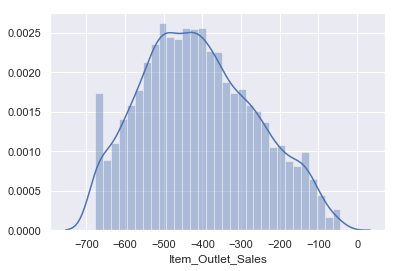

In [96]:
x = sns.distplot((np.log(1/B))**3)#, fit=norm, kde=False

In [ ]:
#from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer()
#pt.fit(B)
#b = pt.transform(B)

The data is right skewed originally. After replacing outliers with 3rd Quartile the distribution has transformed to aprroximately normal distribution. So there is no need of further transformation

In [ ]:
data.columns

Same applies for the Item weight. The distribution is close to normal

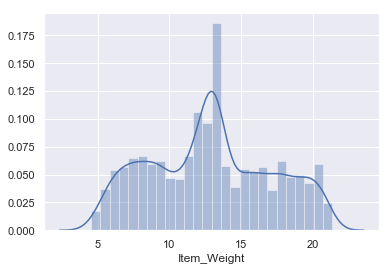

In [97]:
from scipy.stats import norm
A = data.Item_Weight
B=A[~np.isnan(A)] #Remove NaN's
x = sns.distplot(B)

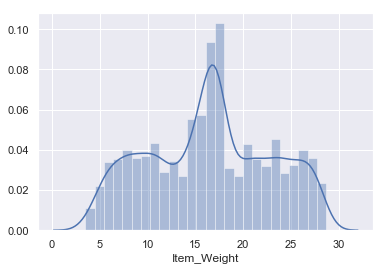

In [98]:
x = sns.distplot(np.log(B)**3)

Item_visibility is close to normal distribution

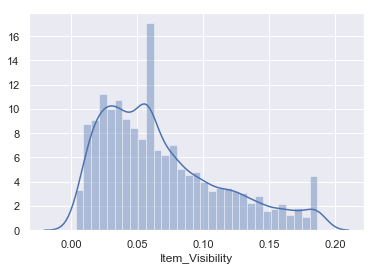

In [99]:
from scipy.stats import norm
A = data.Item_Visibility
B=A[~np.isnan(A)] #Remove NaN's
x = sns.distplot(B)

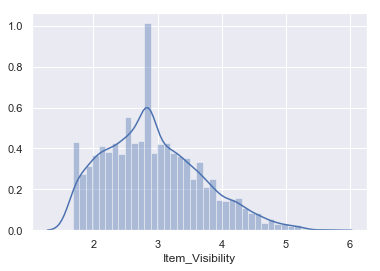

In [101]:
x = sns.distplot(np.log(1/(B)))

Same with the Item_MRP

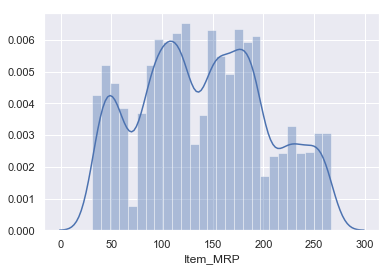

In [102]:
from scipy.stats import norm
A = data.Item_MRP
B=A[~np.isnan(A)] #Remove NaN's
x = sns.distplot(B)

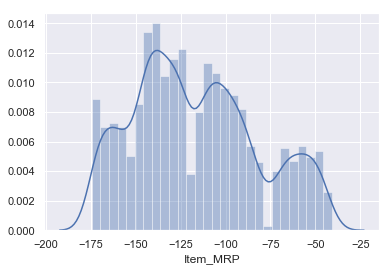

In [103]:
x  = sns.distplot((np.log(1/B))**3)

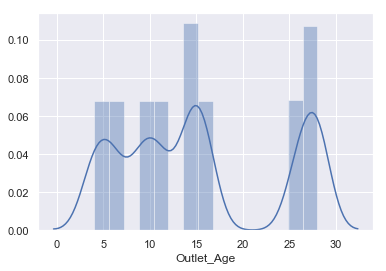

In [104]:
from scipy.stats import norm
A = data.Outlet_Age
B=A[~np.isnan(A)] #Remove NaN's
x = sns.distplot(B)

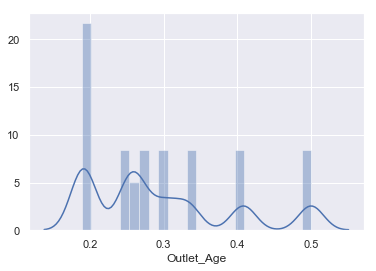

In [105]:
x  = sns.distplot(1/np.sqrt(B))

In [ ]:
Preparing data for feature importance step:

In [106]:
X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_classification', 'Item_Fat_Type', 'Outlet_Age']]
y = data_target['Item_Outlet_Sales']

X_en = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_classification', 'Item_Fat_Type', 'Outlet_Age']]
Y_en = data['Item_Outlet_Sales']

Preparing data for linear regression

1) On target variable Item_Outlet_Sales 
2) Item Weight has being retained the same as there is no much difference even after transformation
3) Item_Visibiity has been transformed
4) Item_MRP has been transformed
5) Outlet_Age has been transformed

In [107]:
B = y
data['Item_Outlet_Sales'] = np.log(1/B)**3


In [ ]:
data['Item_Outlet_Sales'].head(10)

In [108]:
data['Item_Visibility'] = data['Item_Visibility']
#data['Item_Visibility'] = sample['Item_Visibility']
data['Item_Visibility'] = np.log(1/(B))

In [109]:
B = data['Item_MRP']
data['Item_MRP']  = np.log(1/B)**3

In [110]:
B = data['Outlet_Age']
data['Outlet_Age'] = (1/np.sqrt(B))

Creating dataframe with all the new transformed columns exclusively for linear regression model

In [111]:
X_lr = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_classification', 'Item_Fat_Type', 'Outlet_Age']]
y_lr = data['Item_Outlet_Sales']

In [ ]:
X_lr.head()

In [112]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas

names = X.columns
rf = RandomForestRegressor()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

info = {'names': names, 'values': rf.feature_importances_}
df = pandas.DataFrame(data=info)

Features sorted by their score:
[(0.461, 'Item_MRP'), (0.2412, 'Outlet_Type'), (0.122, 'Item_Visibility'), (0.0762, 'Item_Weight'), (0.0551, 'Outlet_Age'), (0.0131, 'Item_classification'), (0.0112, 'Outlet_Size'), (0.0104, 'Item_Fat_Type'), (0.0098, 'Outlet_Location_Type')]


In [ ]:
for n, v in zip(feature_names, Feature_values):
    print("{} = {}".format(n, v))

In [ ]:
#from xgboost import XGBClassifier, plot_importance
#model = XGBClassifier()
#model.fit(X,y)

In [113]:
d_train = X.loc[1:4000]
tar_train = y.loc[1:4000]

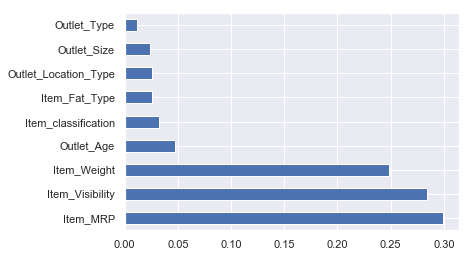

In [114]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
tar_train = tar_train.astype(int)

model.fit(d_train,tar_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')

From the above feature importance plot we will try and consider to every feature except outlet type.

In [115]:
X_final = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_classification', 'Item_Fat_Type', 'Outlet_Age']]
Y_final = pd.DataFrame(data['Item_Outlet_Sales'])

In [ ]:
X_final.head(10)

In [ ]:
X_train.columns

In [116]:
to_scale = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_classification', 'Item_Fat_Type',
       'Outlet_Age']
to_scale_y = ['Item_Outlet_Sales']

In [117]:
from sklearn.preprocessing import scale
X_final.loc[:, to_scale] = scale(X_final[to_scale])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [118]:
Y_final.loc[:,to_scale_y] = scale(Y_final[to_scale_y])

In [119]:
# Please write all the code with proper documentation

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.33) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


(3825, 8) (3825, 1)
(1885, 8) (1885, 1)
(2813, 8) (2813, 1)


In [120]:
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_cv)

Text(0, 0.5, 'Predictions')

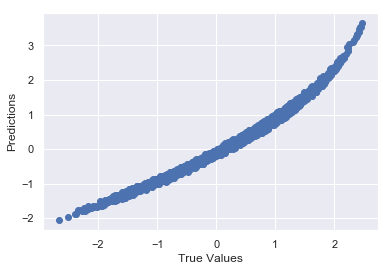

In [121]:
plt.scatter(y_cv, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [122]:
model.score(X_train, y_train)

0.9703419974485884

In [123]:
predictions

array([[-0.74671488],
       [ 1.43057314],
       [ 0.20610993],
       ...,
       [-0.08844186],
       [ 0.9349226 ],
       [-0.14271026]])

In [124]:
print(model.score(X_test, y_test))

0.9697083928409037


In [125]:
from sklearn.model_selection import cross_val_score
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=20, scoring= 'r2')
print(scores.mean(), scores.std())

0.9699785155169984 0.006616292037636408


Best parameter alpha for ridge regression

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

ridge = Ridge()

ridge_regressor = GridSearchCV(ridge, parameters, scoring ='r2', cv = 5)
ridge_regressor.fit(X_train, y_train)

#for i in alpha:
  #  clf = Ridge(alpha = i)
  #  scores = cross_val_score(clf, X_train, y_train, cv=20, scoring= 'r2')
  #  model = clf.fit(X_train, y_train)
  #  pred = clf.predict(X_train)
  #  print("The mean score and std score for alpha= {0} are {1} and {2}" .format(i, scores.mean(), scores.std()))
    

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [127]:
ridge_regressor.best_params_

{'alpha': 1}

In [128]:
ridge_regressor.best_score_

0.9702304858459139

In [130]:
from sklearn.linear_model import Ridge
ridge = Ridge()
clf = Ridge(alpha = 1, normalize=True)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring= 'r2')
model = clf.fit(X_train, y_train)
pred = clf.predict(X_train)
print("The mean score and std score for alpha= 1 are {1} and {2}" .format(i, scores.mean(), scores.std()))


The mean score and std score for alpha= 1 are 0.7608590792286698 and 0.004121141533116741


In [ ]:
model.coef_

In [ ]:
#ft_importances_ridge = pd.Series(model.coef_, index = X_train.columns)
#ft_importances_ridge.plot(kind='barh')
#plot.show()

Best parameter alpha for lasso regression

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring ='r2', cv = 5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [132]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [133]:
lasso_regressor.best_score_

0.970241845998719

In [134]:
from sklearn.linear_model import Lasso
lasso = Lasso()
clf = Lasso(alpha = 0.001, normalize=True)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring= 'r2')
model = clf.fit(X_train, y_train)
pred = clf.predict(X_train)
print("The mean score and std score for alpha= 0.001 are {1} and {2}" .format(i, scores.mean(), scores.std()))


The mean score and std score for alpha= 0.001 are 0.9645072700850317 and 0.0028641903080584377


Best parameter alpha for elasticnet

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

elasticnet = ElasticNet()
en_regressor = GridSearchCV(elasticnet, parameters, scoring ='r2', cv = 5)
en_regressor.fit(X_train, y_train)
print(en_regressor.best_params_)
print(en_regressor.best_score_)

{'alpha': 0.001}
0.9702404644379954


In [136]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
clf = ElasticNet(alpha = 0.001, normalize=True)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring= 'r2')
model = clf.fit(X_train, y_train)
pred = clf.predict(X_train)
print("The mean score and std score for alpha= 0.01 are {1} and {2}" .format(i, scores.mean(), scores.std()))


The mean score and std score for alpha= 0.01 are 0.6505687633742097 and 0.003772477155286789


Model Selection

Performing Test train split so as to use non-normalized data.

In [154]:
# Please write all the code with proper documentation

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(6392, 9) (6392,)
(2131, 9) (2131,)


In [155]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

best_models = []
best_models.append(('LR', LinearRegression()))
best_models.append(('Ridge', Ridge()))
best_models.append(('Lasso', Lasso()))
best_models.append(('ElasticNet', ElasticNet()))
#best_models.append(('LogR', LogisticRegression()))
best_models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
best_models.append(('RandomForestRegressor', RandomForestRegressor()))
best_models.append(('GradientBoostRegressor', GradientBoostingRegressor()))
best_models.append(('XGB Regressor', xgb.XGBRegressor()))
best_models.append(('SupportVectorRegressor', SVR()))
results = []
names = []
for name, model in best_models:
    kfold = KFold(n_splits=5, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.508980 (0.016425)
Ridge: 0.509010 (0.016525)
Lasso: 0.508862 (0.016783)
ElasticNet: 0.458360 (0.011107)
DecisionTreeRegressor: 0.184544 (0.066478)
RandomForestRegressor: 0.555656 (0.019138)
GradientBoostRegressor: 0.602151 (0.015724)
XGB Regressor: 0.531097 (0.023172)
SupportVectorRegressor: 0.161216 (0.010916)


So by above Observations we Gradient boosting regressoe acquired good r2 score than the rest. So we would tune our model 
using GBR.

In [156]:
# GridSearch for hyper parameter tuning of GBR
from sklearn.model_selection import StratifiedKFold
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
parameters = {
    "alpha" : [1e-3, 1e-2, 20],
    "ccp_alpha" : [5,10],
    "learning_rate" : [0.1],
    "loss" : ['ls','lad'],
    "max_depth" : [1,7],
    #"max_features" : [3,4,7,8],
    #"n_estimators" : [6,7,8],
    "tol" : [1,5,10],
    #"validation_fraction" : [0.01,0.1,0.5,0.9,1]
}

gbr = GradientBoostingRegressor()
en_regressor = GridSearchCV(gbr, parameters, verbose = 1, scoring ='r2', cv = 5)
en_regressor.fit(X_train, y_train)
print("Best: %f using %s " %(en_regressor.best_score_, en_regressor.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.6min finished


Best: 0.559598 using {'alpha': 0.001, 'ccp_alpha': 5, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 1, 'tol': 1} 


In [157]:
# GridSearch for hyper parameter tuning of XGB Regressor
from sklearn.model_selection import StratifiedKFold
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
parameters = {"learning_rate"    : [0.05, 0.20, 0.30 ] ,
              "max_depth"        : [ 3,5,7],
              "min_child_weight" : [ 1, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.3 ],
              "colsample_bytree" : [ 0.3, 0.5 , 0.7 ] }
xg = xgb.XGBRegressor()
xg_regressor = GridSearchCV(xg, parameters, verbose = 1, scoring ='r2', cv = 5)
xg_regressor.fit(X_train, y_train)
print("Best: %f using %s " %(xg_regressor.best_score_, xg_regressor.best_params_))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.601258 using {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1} 


[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed:  4.0min finished


In [158]:
xg_regressor.score(X_test,y_test)

0.5822104231898378

This the model prediction against the test data:

In [ ]:
gradient_boosting_regresor_model.predict(X_test)